<a href="https://colab.research.google.com/github/wesleyorrr/Analise-de-satisfacao-Supermercados-e-mercearias-Curvelo-MG/blob/main/Ranking_do_ramo_aliment%C3%ADcio_da_Cidade_de_Curvelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Análise de engajamento digital segundo avaliações do Google***

# 📊 Ranking do Ramo Alimentício da Cidade de Curvelo (2025)

Este projeto tem como objetivo analisar o **engajamento digital de estabelecimentos do ramo alimentício da cidade de Curvelo**, com base nas avaliações públicas disponíveis no **Google Maps**.  

📅 **Ano da coleta dos dados**: 2025  
📌 **Fonte**: Avaliações e notas dos clientes virtuais no Google  

A análise foi dividida em duas frentes:

1. **Google Colab (Python + Pandas + Seaborn/Matplotlib)**  
   - Processamento e limpeza dos dados  
   - Criação de 3 visualizações principais:  
     - Média de engajamento por tipo de estabelecimento  
     - Top 5 estabelecimentos mais bem avaliados  
     - Top 5 estabelecimentos com menor avaliação  

2. **Power BI**  
   - Replicação das mesmas 3 visualizações do Colab  
   - Criação de gráficos adicionais e painel interativo para melhor apresentação dos resultados  

O objetivo final é fornecer um **ranking atualizado de 2025** que possa ser utilizado por empresas e gestores locais como referência para entender sua posição no mercado e oportunidades de melhoria em seu engajamento online.


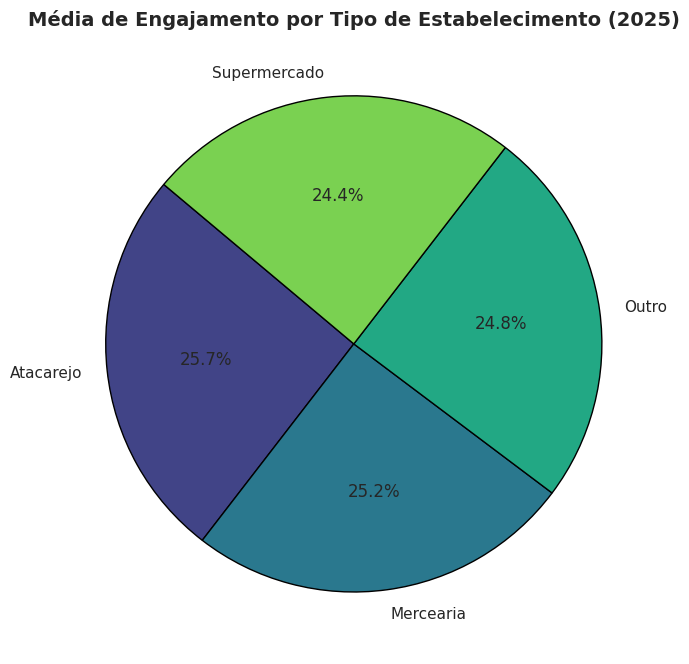

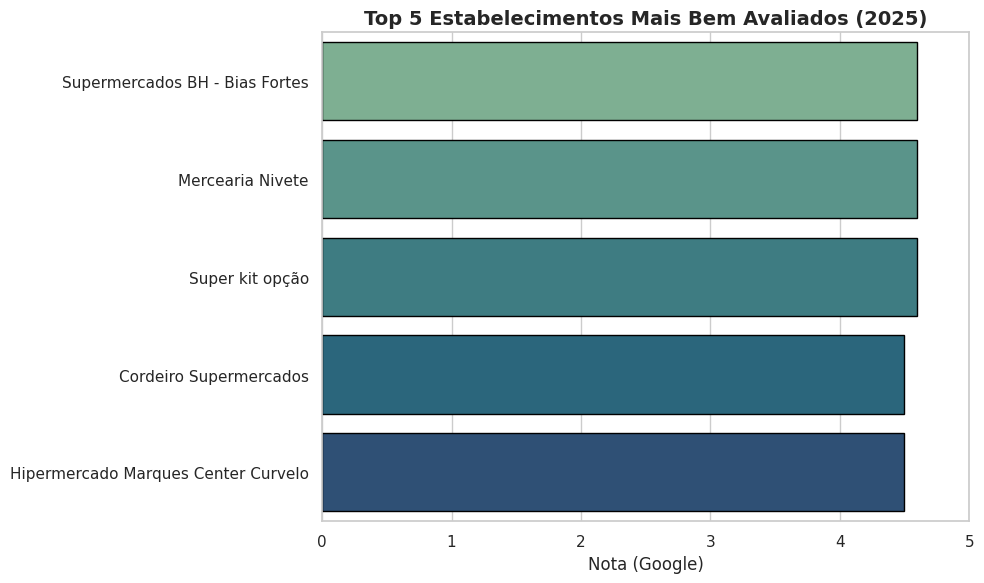

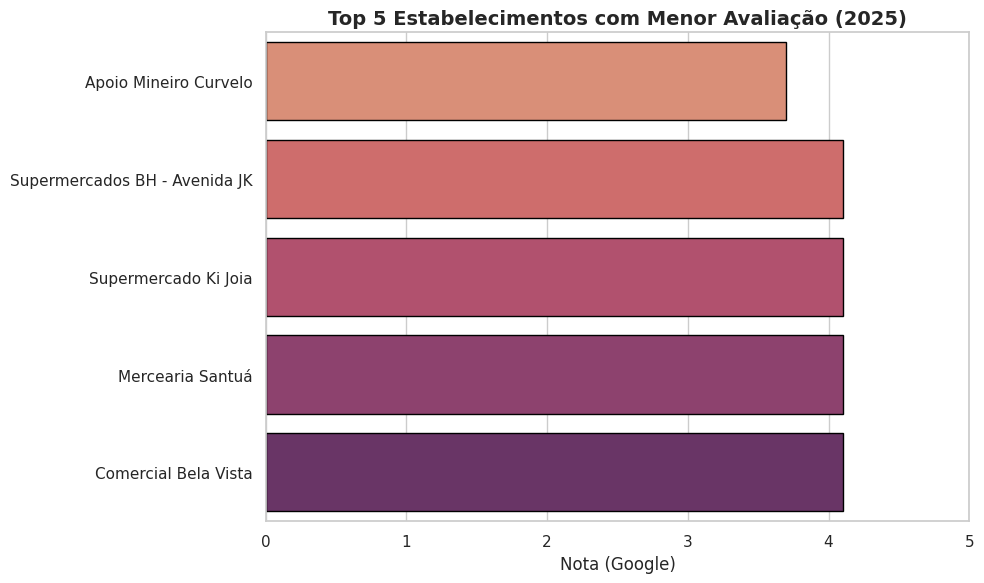

In [12]:
# ========================================
# RELATÓRIO GRÁFICO - ESTABELECIMENTOS CURVELO 2025
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# -------------------------------
# 1. Base de Dados (fixa no código)
# -------------------------------
dados = """Estabelecimento	Nota	Tipo	Ranking_2025
Cordeiro Supermercados	4,5	Supermercado	5
Hipermercado Marques Center Curvelo	4,5	Supermercado	5
Supermercados BH - Bias Fortes	4,6	Supermercado	1
Supermercados BH - Avenida JK	4,1	Supermercado	1
Mart Minas - Atacado & Varejo	4,5	Atacarejo	14
Cordeiro Atacarejo	4,5	Atacarejo	5
Supermercado Ki Joia	4,1	Supermercado	1
Apoio Mineiro Curvelo	3,7	Supermercado	14
Mercearia Santuá	4,1	Mercearia	19
Ponto Certo Cereais	4,3	Outro	14
EmbalaBem	4,4	Outro	12
Supermercado Matias	4,4	Supermercado	12
Comercial Bela Vista	4,1	Outro	10
Mercearia Nivete	4,6	Mercearia	14
Super kit opção	4,6	Outro	1
Mercearia Nossa Senhora da Conceição	4,5	Mercearia	5
Mercearia Palmeiras	4,4	Mercearia	5
Mercearia do Julinho	4,5	Mercearia	10
"""

# Lendo os dados
df = pd.read_csv(io.StringIO(dados), sep="\t")

# Corrige vírgula para ponto
df["Nota"] = df["Nota"].astype(str).str.replace(",", ".").astype(float)

# Configuração visual padrão
sns.set(style="whitegrid")

# ===================================
# 2. Média por tipo - Gráfico de Pizza
# ===================================
media_por_tipo = df.groupby("Tipo")["Nota"].mean()
plt.figure(figsize=(7,7))
colors = sns.color_palette("viridis", len(media_por_tipo))
plt.pie(
    media_por_tipo,
    labels=media_por_tipo.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'black'}
)
plt.title("Média de Engajamento por Tipo de Estabelecimento (2025)", fontsize=14, weight="bold")
plt.tight_layout()
plt.savefig("pizza_media_por_tipo.png", dpi=300)
plt.show()

# ===================================
# 3. Top 5 Melhores - Barras horizontais
# ===================================
melhores = df.nlargest(5, "Nota")
plt.figure(figsize=(10,6))
sns.barplot(
    x="Nota",
    y="Estabelecimento",
    data=melhores,
    hue="Estabelecimento",
    palette="crest",
    edgecolor="black",
    dodge=False,
    legend=False
)
plt.title("Top 5 Estabelecimentos Mais Bem Avaliados (2025)", fontsize=14, weight="bold")
plt.xlabel("Nota (Google)")
plt.ylabel("")
plt.xlim(0,5)
plt.tight_layout()
plt.savefig("cubos_top5_melhores.png", dpi=300)
plt.show()

# ===================================
# 4. Top 5 Piores - Barras horizontais
# ===================================
piores = df.nsmallest(5, "Nota")
plt.figure(figsize=(10,6))
sns.barplot(
    x="Nota",
    y="Estabelecimento",
    data=piores,
    hue="Estabelecimento",
    palette="flare",
    edgecolor="black",
    dodge=False,
    legend=False
)
plt.title("Top 5 Estabelecimentos com Menor Avaliação (2025)", fontsize=14, weight="bold")
plt.xlabel("Nota (Google)")
plt.ylabel("")
plt.xlim(0,5)
plt.tight_layout()
plt.savefig("cubos_top5_piores.png", dpi=300)
plt.show()
